In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('logistic_regression.txt')

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
df.shape

(396030, 27)

### Their are total 396030 data points, 26 features and 1 label.

In [5]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

### displays the columns present in the dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### We can observe that some features are having object data type which need to be converted to int or float data type.

In [7]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


### we can observe that the gap between mean and median values is drastic so loan_amnt feature is effected by outliers
### int_rate is not effected by outliers as mean and the median values are almost same.
### installment is 

In [8]:
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [9]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

### we can see emp_title, emp_length, title, revol_util, mort_acc, pub_rec_bankruptcies are having missing values need to impute data using some imputation techniques like mean, median or model based Imputing(KNNImputer).

In [10]:
df['loan_status'].value_counts(normalize=True)

Fully Paid     0.803871
Charged Off    0.196129
Name: loan_status, dtype: float64

### the 80.38% people in the data set repayed loan and 19.61% of the data points either repaying the loan or defaulters. 

In [11]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [12]:
df['pub_rec'].value_counts()

0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
86.0         1
40.0         1
17.0         1
15.0         1
24.0         1
Name: pub_rec, dtype: int64

### most of the people are having good public record only a few are having bad public record.

In [13]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

### only a few number of people are taking loan account in multiple numbers.

In [14]:
df['pub_rec_bankruptcies'].value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [15]:
df['pub_rec'] = df['pub_rec'].apply(lambda x:1 if x>1 else 0)
df['mort_acc'] = df['mort_acc'].apply(lambda x:1 if x>1 else 0)
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].apply(lambda x:1 if x>1 else 0)

### converting all the records with value more than 1 as 1 and else 0

In [16]:
df['pub_rec'].value_counts()

0    388011
1      8019
Name: pub_rec, dtype: int64

In [17]:
df['mort_acc'].value_counts()

0    237988
1    158042
Name: mort_acc, dtype: int64

In [18]:
df['pub_rec_bankruptcies'].value_counts()

0    393705
1      2325
Name: pub_rec_bankruptcies, dtype: int64

### verifing the changed records are reflected

In [19]:
df['term'].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

In [20]:
#df['grade'] = df['grade'].replace(df['grade'].value_counts(normalize=True).index,df['grade'].value_counts(normalize=True).values)

In [21]:
df['grade'].replace(df['grade'].value_counts(normalize=True).index,df['grade'].value_counts(normalize=True).values)

0         0.292953
1         0.292953
2         0.292953
3         0.162076
4         0.267624
            ...   
396025    0.292953
396026    0.267624
396027    0.292953
396028    0.267624
396029    0.267624
Name: grade, Length: 396030, dtype: float64

In [22]:
df['sub_grade'].value_counts()

B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64

In [23]:
#df['emp_title'].replace(df['emp_title'].value_counts(normalize=True).index,df['emp_title'].value_counts(normalize=True).values)

In [24]:
df['emp_title'].value_counts(normalize=True)

Teacher                       0.011764
Manager                       0.011391
Registered Nurse              0.004974
RN                            0.004948
Supervisor                    0.004905
                                ...   
Teachers aide/bus monitor     0.000003
TJCross Engineers             0.000003
assitsant manager             0.000003
Applied Energy                0.000003
Healthcare Call Center Rep    0.000003
Name: emp_title, Length: 173105, dtype: float64

In [25]:
df['emp_length'] = df['emp_length'].replace(df['emp_length'].value_counts(normalize=True).index,df['emp_length'].value_counts(normalize=True).values)

### converting the feature emp_length to category 

In [26]:
df['home_ownership'] = df['home_ownership'].replace(df['home_ownership'].value_counts(normalize=True).index,df['home_ownership'].value_counts(normalize=True).values)

In [27]:
df['verification_status'] = df['verification_status'].replace(df['verification_status'].value_counts(normalize=True).index,df['verification_status'].value_counts(normalize=True).values)

In [28]:
df['issue_d'] = df['issue_d'].replace(df['issue_d'].value_counts(normalize=True).index,df['issue_d'].value_counts(normalize=True).values)

In [29]:
#df['loan_status'] = df['loan_status'].replace(df['loan_status'].value_counts(normalize=True).index,df['loan_status'].value_counts(normalize=True).values)

In [30]:
df['purpose'] = df['purpose'].replace(df['purpose'].value_counts(normalize=True).index,df['purpose'].value_counts(normalize=True).values)

In [31]:
#df['title'].replace(df['title'].value_counts(normalize=True).index,df['title'].value_counts(normalize=True).values)

In [32]:
df['title'].value_counts()

Debt consolidation                     152472
Credit card refinancing                 51487
Home improvement                        15264
Other                                   12930
Debt Consolidation                      11608
                                        ...  
Debt Consolotation                          1
My Debt Consolidation loan                  1
Short term until 12/31                      1
On a Debt Free Adventure of my own!         1
cc debt consolidation                       1
Name: title, Length: 48817, dtype: int64

In [33]:
df['earliest_cr_line'] = df['earliest_cr_line'].replace(df['earliest_cr_line'].value_counts(normalize=True).index,df['earliest_cr_line'].value_counts(normalize=True).values)

In [34]:
df['initial_list_status'] = df['initial_list_status'].replace(df['initial_list_status'].value_counts(normalize=True).index,df['initial_list_status'].value_counts(normalize=True).values)

In [35]:
df['application_type'] = df['application_type'].replace(df['application_type'].value_counts(normalize=True).index,df['application_type'].value_counts(normalize=True).values)

In [36]:
replacer = dict({'term':{' 36 months':3,' 60 months':5},'grade':{'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7},'loan_status':{'Fully Paid':1,'Charged Off':0}})

In [37]:
df['grade']

0         B
1         B
2         B
3         A
4         C
         ..
396025    B
396026    C
396027    B
396028    C
396029    C
Name: grade, Length: 396030, dtype: object

In [38]:
df = df.replace(replacer)

### as grade is cardinal and loan status is target variable and term is binary we are converting this using the replace function.

In [39]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,3,11.44,329.48,2,B4,Marketing,0.333681,0.403480,117000.0,...,16.0,0,36369.0,41.8,25.0,0.398869,0.998205,0,0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,3,11.99,265.68,2,B5,Credit analyst,0.063411,0.500841,65000.0,...,17.0,0,20131.0,53.3,27.0,0.601131,0.998205,1,0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,3,10.49,506.97,2,B3,Statistician,0.083989,0.403480,43057.0,...,13.0,0,11987.0,92.2,26.0,0.601131,0.998205,0,0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,3,6.49,220.65,1,A2,Client Advocate,0.055174,0.403480,54000.0,...,6.0,0,5472.0,21.5,13.0,0.601131,0.998205,0,0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,5,17.27,609.33,3,C5,Destiny Management Inc.,0.040542,0.500841,55000.0,...,13.0,0,24584.0,69.8,43.0,0.601131,0.998205,0,0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [40]:
df['grade'].value_counts()

2    116018
3    105987
1     64187
4     63524
5     31488
6     11772
7      3054
Name: grade, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  int64  
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  float64
 8   home_ownership        396030 non-null  float64
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  float64
 11  issue_d               396030 non-null  float64
 12  loan_status           396030 non-null  int64  
 13  purpose               396030 non-null  float64
 14  title                 394275 non-null  object 
 15  

In [42]:
df = df.drop(columns=['sub_grade','emp_title','title','address'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  int64  
 5   emp_length            377729 non-null  float64
 6   home_ownership        396030 non-null  float64
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  float64
 9   issue_d               396030 non-null  float64
 10  loan_status           396030 non-null  int64  
 11  purpose               396030 non-null  float64
 12  dti                   396030 non-null  float64
 13  earliest_cr_line      396030 non-null  float64
 14  open_acc              396030 non-null  float64
 15  

In [44]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies        0
dtype: int64

### still emp_length and revol_util are having some missing values so we have to fill the missing data with the help of some imputer.

In [45]:
df[df['emp_length'].isna()]

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
35,5375.0,3,13.11,181.39,2,NaN,0.403480,34000.00,0.352405,0.019107,...,0.003889,9.0,0,14998.0,88.7,20.0,0.601131,0.998205,1,0
36,3250.0,3,16.78,115.52,3,NaN,0.403480,22500.00,0.352405,0.023008,...,0.000720,7.0,0,7587.0,54.6,7.0,0.601131,0.998205,0,0
49,15000.0,3,7.89,469.29,1,NaN,0.500841,90000.00,0.352405,0.007643,...,0.003288,7.0,0,8205.0,93.2,18.0,0.398869,0.998205,1,0
58,10000.0,3,17.56,359.33,4,NaN,0.500841,32000.00,0.352405,0.021794,...,0.003972,6.0,0,11615.0,82.4,7.0,0.398869,0.998205,0,0
91,30225.0,5,18.24,771.47,4,NaN,0.500841,65800.00,0.352405,0.019847,...,0.004876,11.0,0,14390.0,69.5,31.0,0.398869,0.998205,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395946,35000.0,5,16.20,854.86,3,NaN,0.500841,84000.00,0.352405,0.025369,...,0.006101,7.0,0,4241.0,18.8,21.0,0.398869,0.998205,1,0
395963,7000.0,3,20.20,260.86,5,NaN,0.095311,32964.00,0.352405,0.019216,...,0.003745,24.0,0,3236.0,9.7,44.0,0.398869,0.998205,0,0
395988,35000.0,5,15.59,843.53,4,NaN,0.095311,102396.00,0.352405,0.022367,...,0.000669,15.0,0,31665.0,32.4,33.0,0.398869,0.998205,0,0
395999,11125.0,3,24.11,437.11,6,NaN,0.500841,31789.88,0.352405,0.010949,...,0.001490,8.0,0,22385.0,81.0,24.0,0.398869,0.998205,1,0


In [46]:
X = df.drop(columns='loan_status')
Y = df['loan_status']

### separating the larget from the main data

In [47]:
from sklearn.impute import SimpleImputer

In [48]:
imputer = SimpleImputer()
imputer.fit(X)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

### imputing the missing vaalues with the help of mean imputer.

In [49]:
X.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,3,11.44,329.48,2,0.333681,0.403480,117000.0,0.315840,0.029556,...,0.001639,16.0,0,36369.0,41.8,25.0,0.398869,0.998205,0,0
1,8000.0,3,11.99,265.68,2,0.063411,0.500841,65000.0,0.315840,0.029556,...,0.004401,17.0,0,20131.0,53.3,27.0,0.601131,0.998205,1,0
2,15600.0,3,10.49,506.97,2,0.083989,0.403480,43057.0,0.331755,0.029556,...,0.003063,13.0,0,11987.0,92.2,26.0,0.601131,0.998205,0,0
3,7200.0,3,6.49,220.65,1,0.055174,0.403480,54000.0,0.315840,0.022367,...,0.003972,6.0,0,5472.0,21.5,13.0,0.601131,0.998205,0,0
4,24375.0,5,17.27,609.33,3,0.040542,0.500841,55000.0,0.352405,0.017600,...,0.004876,13.0,0,24584.0,69.8,43.0,0.601131,0.998205,0,0


In [50]:
def all_plots(X):
    for i in X.columns:
        sns.displot(data=X,x=i)
    plt.show()

### function used to plot the univariet plots.

In [51]:
plt.rcParams.update({'figure.max_open_warning': 0})

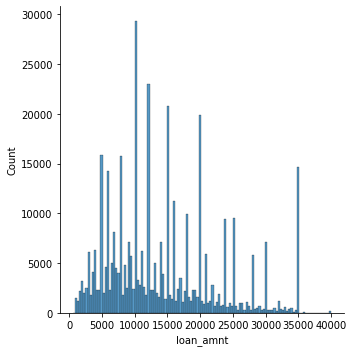

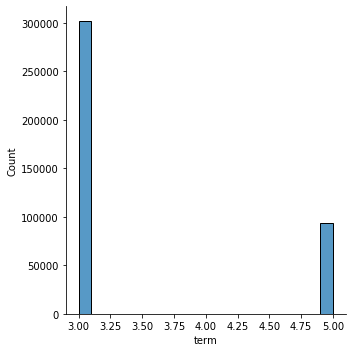

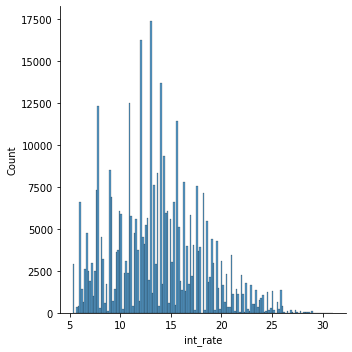

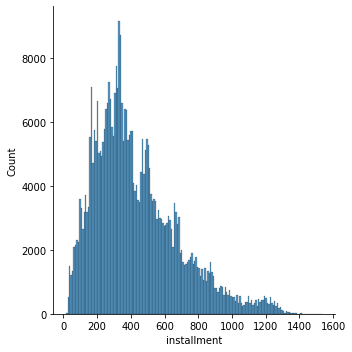

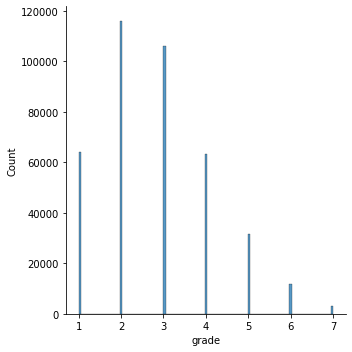

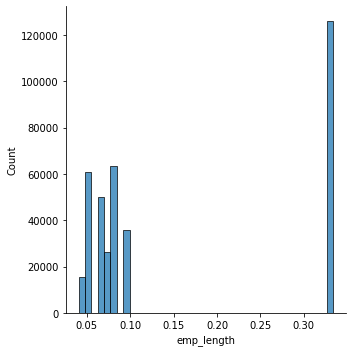

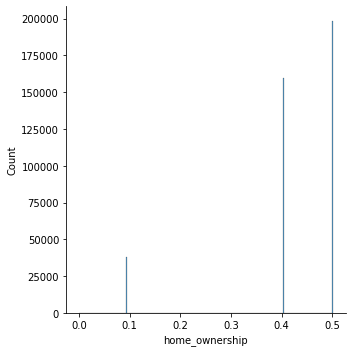

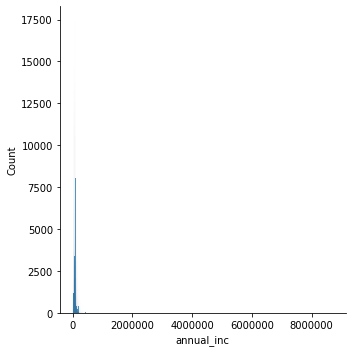

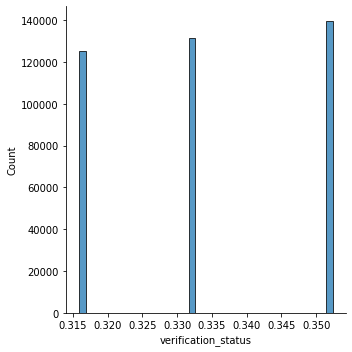

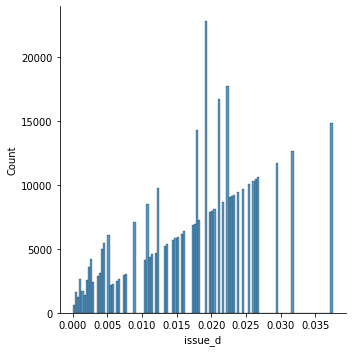

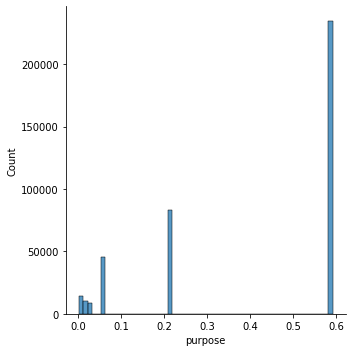

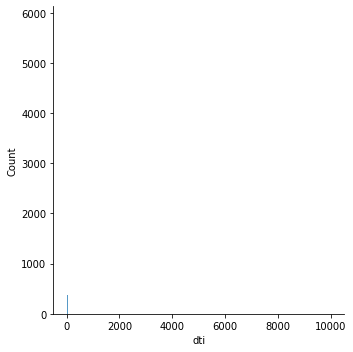

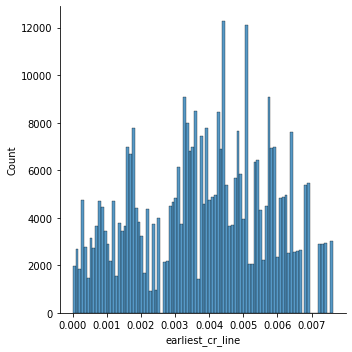

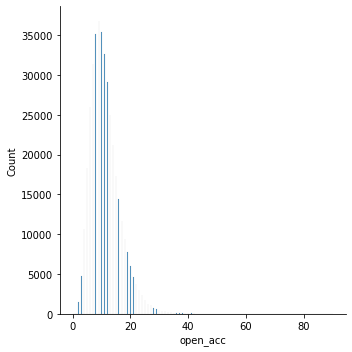

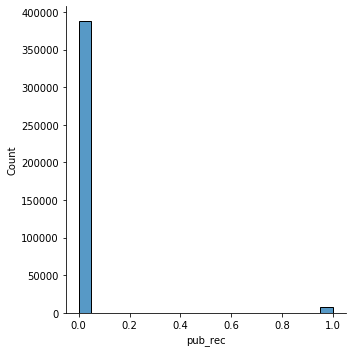

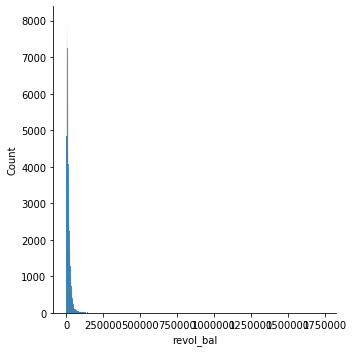

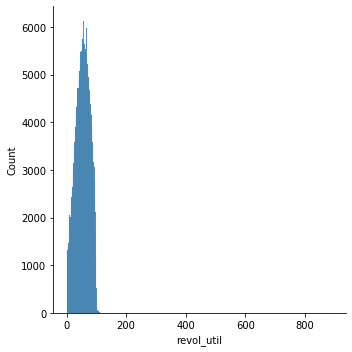

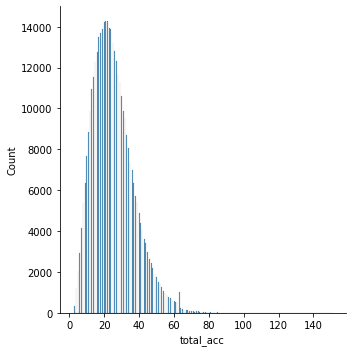

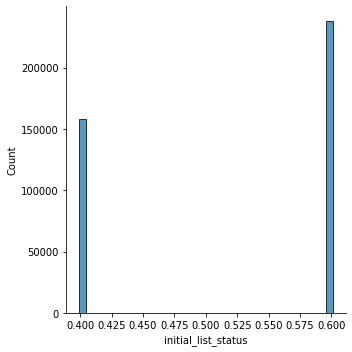

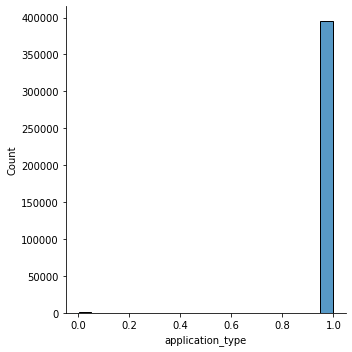

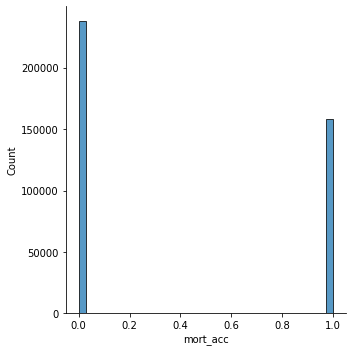

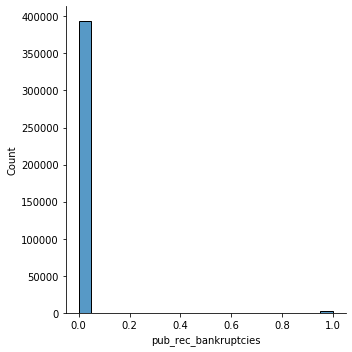

In [52]:
all_plots(X)

### we can see the how the perticular feature is varying some are binary some are multi variet and some are numerical in nature

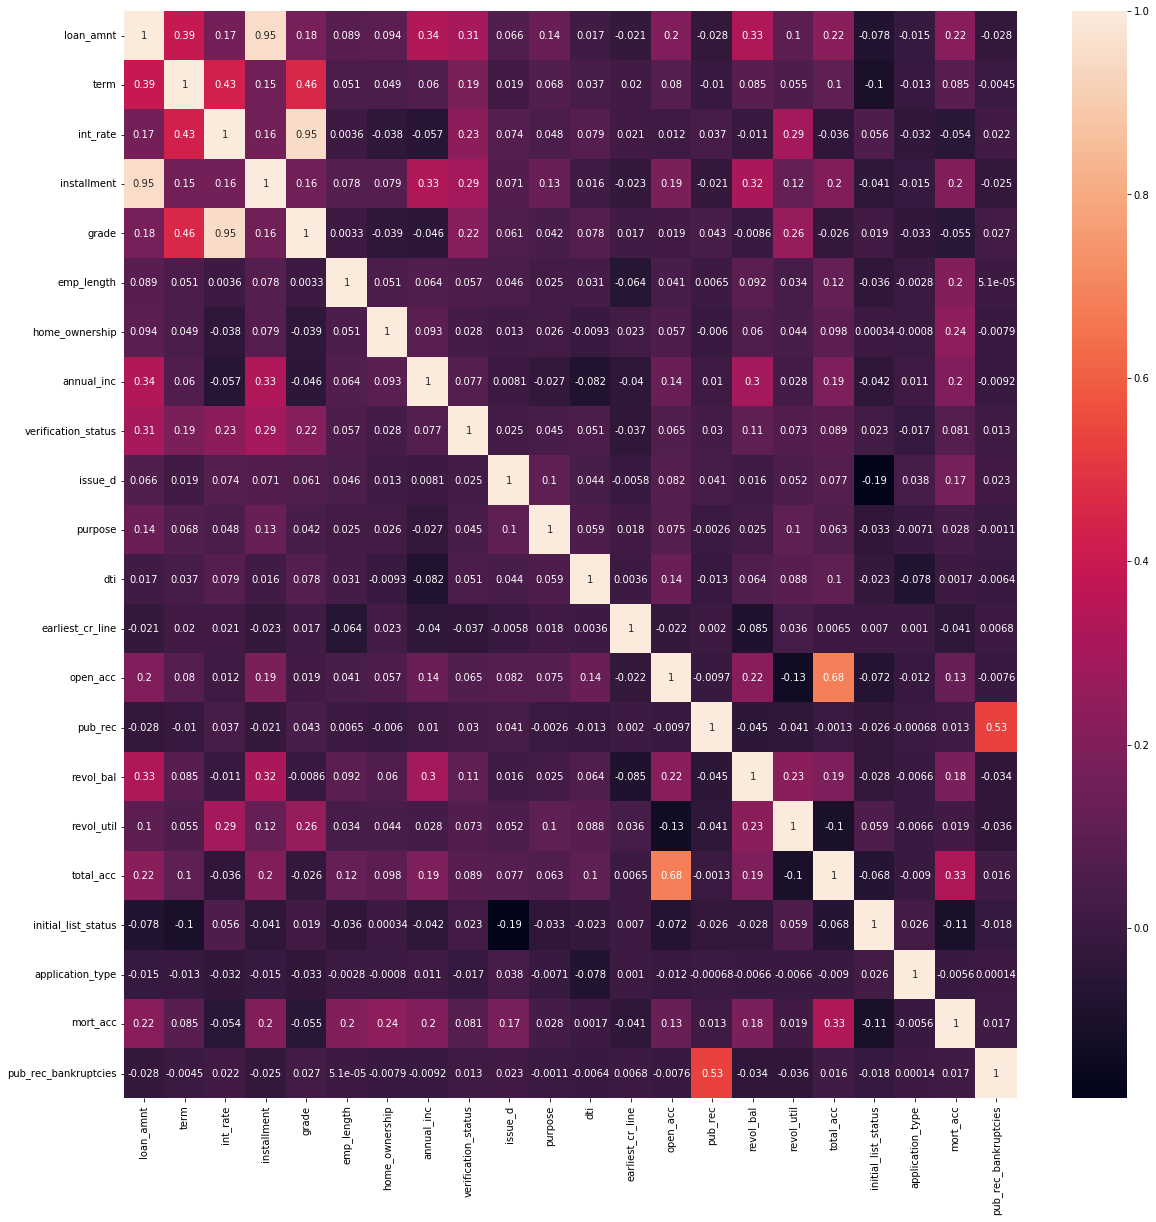

In [68]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(X.corr(),annot=True,ax=ax)
plt.show()

### loan_amount and instalment are having high corelation followed by grade and int_rate are having higher corelation pub_rec and pub_rec_bankruptcy ia also having higher corelation

In [49]:
X_new = imputer.transform(X)

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaling = StandardScaler()
scaling.fit(X_new)

StandardScaler(copy=True, with_mean=True, with_std=True)

### standardizing the data using standerd scaler

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test = train_test_split(X_new,Y,test_size=0.20,random_state=42)

### splitting 80% of data to train and remaining 20% data to test

In [54]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((316824, 22), (79206, 22), (316824,), (79206,))

In [55]:
x_train = scaling.transform(x_train)

In [56]:
x_test = scaling.transform(x_test)

In [57]:
from sklearn.linear_model import LogisticRegression

### importing logistic regression from sklearn

In [58]:
model = LogisticRegression(random_state=42).fit(x_train,y_train)

In [59]:
pred = model.predict(x_test)

In [60]:
for i,j in zip(X.columns , model.coef_[0]):
    print(f"The feature  {i}  feature importance is:-  {j}")

The feature  loan_amnt  feature importance is:-  0.054416986801077025
The feature  term  feature importance is:-  -0.21231854222108398
The feature  int_rate  feature importance is:-  -0.01905039778871478
The feature  installment  feature importance is:-  -0.1116727229952053
The feature  grade  feature importance is:-  -0.4384954825225699
The feature  emp_length  feature importance is:-  0.02675927582476799
The feature  home_ownership  feature importance is:-  0.04253679424952343
The feature  annual_inc  feature importance is:-  0.18555571602713264
The feature  verification_status  feature importance is:-  -0.040995481724045
The feature  issue_d  feature importance is:-  -0.14512588758930342
The feature  purpose  feature importance is:-  0.0074447428705224465
The feature  dti  feature importance is:-  -0.4360867366819868
The feature  earliest_cr_line  feature importance is:-  0.0171016475512284
The feature  open_acc  feature importance is:-  -0.10054705261849302
The feature  pub_rec  fe

### grade is important feature followed by dti

In [61]:
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score,confusion_matrix,roc_curve,precision_recall_curve

In [62]:
confusion_matrix(y_test.values,pred)

array([[ 1226, 14351],
       [ 1130, 62499]], dtype=int64)

In [63]:
tn, fp, fn, tp = confusion_matrix(y_test.values,pred).flatten()

In [64]:
precision_score(y_test.values,pred),tp/(tp+fp)

(0.8132595966167859, 0.8132595966167859)

### our model is giving an precision of 81.32%

In [65]:
recall_score(y_test.values,pred),tp/(tp+fn)

(0.9822408021499631, 0.9822408021499631)

### our model is giving an recall of 98.22%

In [66]:
f1_score(y_test.values,pred)

0.8897984752169363

### our model is giving an F1 score of 88.97%

In [67]:
roc_auc_score(y_test.values,pred)

0.5304732931594651

In [68]:
pred_proba = model.predict_proba(x_test)

In [69]:
pred_proba

array([[0.27767617, 0.72232383],
       [0.39748346, 0.60251654],
       [0.32558046, 0.67441954],
       ...,
       [0.14974418, 0.85025582],
       [0.09429087, 0.90570913],
       [0.40694468, 0.59305532]])

### predicting the probabilities of both teh class 0 and class 1

In [70]:
fpr, tpr, threshold = roc_curve(y_test.values,pred_proba[:,1])

In [71]:
fpr, tpr, threshold

(array([0.00000000e+00, 6.41972138e-05, 6.41972138e-05, ...,
        9.99871606e-01, 1.00000000e+00, 1.00000000e+00]),
 array([0.00000000e+00, 0.00000000e+00, 1.25728834e-04, ...,
        9.99984284e-01, 9.99984284e-01, 1.00000000e+00]),
 array([2.        , 1.        , 0.99795403, ..., 0.24356935, 0.23205378,
        0.18039997]))

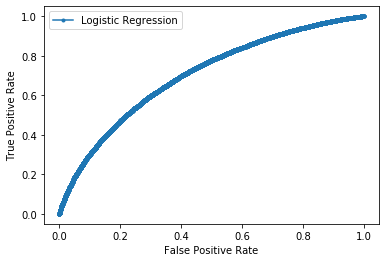

In [72]:
plt.plot(fpr,tpr,marker='.',label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### plotting the ROC-AUC curve

In [73]:
precision_val, recall_val, threshold  = precision_recall_curve(y_test,pred_proba[:,1])

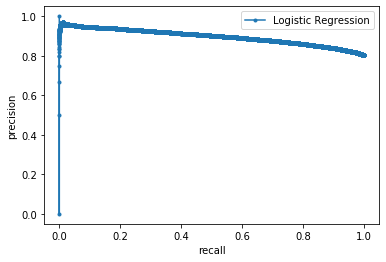

In [74]:
plt.plot(recall_val,precision_val,marker='.',label='Logistic Regression')
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend()
plt.show()

### plotting the precision recall curve we can observe that if we want to get more precision (less FP) thenn we have to sacrifice the recall score.

In [75]:
max(precision_val),threshold

(1.0,
 array([0.18039997, 0.23205378, 0.24101828, ..., 0.99999912, 1.        ,
        1.        ]))

In [76]:
recall_val

array([1.00000000e+00, 9.99984284e-01, 9.99984284e-01, ...,
       1.57161043e-05, 0.00000000e+00, 0.00000000e+00])

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
model_h_tuned = LogisticRegression(random_state=42)

In [96]:
hyperparameters = {'C':np.arange(0.1,3.4,0.1)}
best_cv = GridSearchCV(estimator=model_h_tuned,param_grid=hyperparameters,n_jobs=-1,scoring='precision')

In [97]:
best_cv.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=0)

### hyperparameter tuning the model to get the best value of C

In [98]:
best_cv.best_estimator_

LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
pred_proba = best_cv.predict_proba(x_test)

In [100]:
precision_score(y_test.values,best_cv.predict(x_test))

0.8132595966167859

In [101]:
precision_score(y_test.values,pred_proba[:,1]>0.96)

0.9625

### the best posible value of precision is 0.9625 and we are getting this value at the threshold 0.96 insted of 0.5 at the same place our recall score is only 0.84%

In [102]:
recall_score(y_test.values,pred_proba[:,1]>0.96)

0.008470980213424696

## Actionable Insights & Recommendations

### if we want to balance between bad loan and at the same time we have to give loans to the people we are repaying correctly we have to use a threshold which balences out both th eprecision and recall score which would be some where around 0.5 and 0.96.
### as grade and dti are contrubuting the most to the prediction we can fine tune and get the exact values which will defenetly help in preventing the bad loans.
### more than 80% of the loan given by the bank is repayed so we can improve offer some reduction in the interest for the people who are repaying the loan on time will decrease the bad loan.